In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

data_dir = './data/'
data_csv = 'driving_log.csv'

matplotlib.style.use('ggplot')
driving_log = pd.read_csv(data_dir+data_csv, skipinitialspace=True)

print(driving_log.shape)
driving_log.head()

(8036, 7)


,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [2]:
print(driving_log['center'][0])
print(driving_log['right'][0])
print(driving_log['left'][0])
print(driving_log['steering'][0])

IMG/center_2016_12_01_13_30_48_287.jpg
IMG/right_2016_12_01_13_30_48_287.jpg
IMG/left_2016_12_01_13_30_48_287.jpg
0.0


steering: 0.10923153


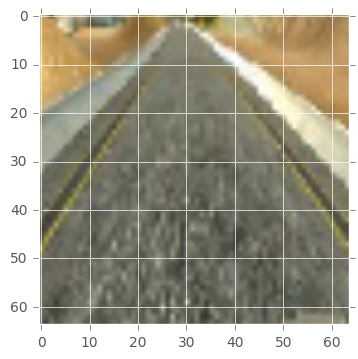

steering: -0.04076847


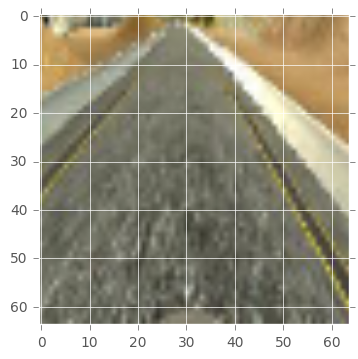

steering: -0.19076847


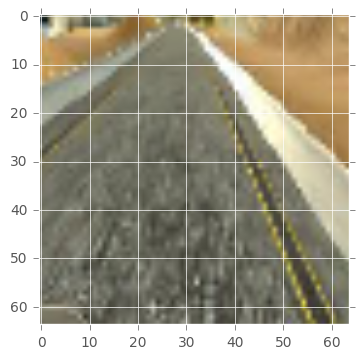

In [3]:
import cv2
import numpy as np

def load_driving_log(input_data, index, camera_type=None, adj_str=0.15):
    if camera_type == None:
        camera_val = np.random.randint(0,3)
        if camera_val == 0:
            camera_type = 'left'
        elif camera_val == 1:
            camera_type = 'right'
        else:
            camera_type = 'center'

    file = input_data[camera_type][index]
    steering = input_data['steering'][index]
    imagepath = data_dir+file
    image = plt.imread(imagepath)
    image = image[60:-20,:,:]
    image = cv2.resize(image,(64,64))
    #image = cv2.resize(image, (0,0), fx=0.5, fy=0.5) #(40, 160, 3)
    rows,cols,_ = image.shape
    if camera_type == 'left':
        steering += adj_str
    elif camera_type == 'right':
        steering -= adj_str
    return image, steering

index = np.random.randint(0,driving_log.shape[0])
sampleImage, sampleStr = load_driving_log(driving_log, index, camera_type='left')
print("steering:", sampleStr)
plt.imshow(sampleImage)
plt.show()
sampleImage, sampleStr = load_driving_log(driving_log, index, camera_type='center')
print("steering:", sampleStr)
plt.imshow(sampleImage)
plt.show()
sampleImage, sampleStr = load_driving_log(driving_log, index, camera_type='right')
print("steering:", sampleStr)
plt.imshow(sampleImage)
plt.show()

(array([  4.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   1.40000000e+01,   1.00000000e+00,
          3.00000000e+00,   2.90000000e+01,   5.00000000e+00,
          1.80000000e+01,   1.80000000e+01,   1.00000000e+01,
          1.30000000e+01,   1.40000000e+01,   2.30000000e+01,
          8.10000000e+01,   4.90000000e+01,   2.10000000e+01,
          4.50000000e+01,   9.70000000e+01,   1.50000000e+01,
          3.60000000e+01,   8.50000000e+01,   2.30000000e+02,
          8.10000000e+01,   1.36000000e+02,   2.79000000e+02,
          2.13000000e+02,   8.40000000e+01,   8.00000000e+01,
        

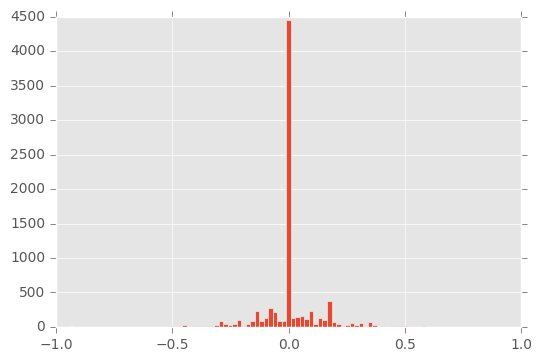

In [4]:
#check steering_raw_data
train_num = driving_log.shape[0]
steering_list = np.empty((0))
for i in range(1, train_num):
    steering_list = np.append(steering_list, driving_log['steering'][i])
    
plt.hist(steering_list.astype('float'), bins=100)

steering : -0.135719285924


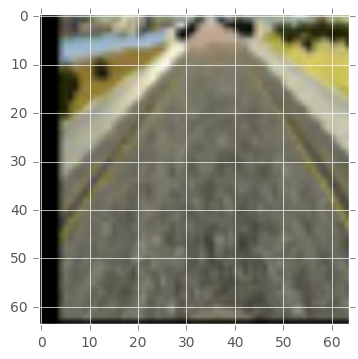

In [5]:
def random_trans(image, steering):    
    rows, cols, _ = image.shape
    trans_x_range = 10
    trans_y_range = 4
    adj_str = 0.05
    trans_x = trans_x_range * np.random.uniform() - trans_x_range/2
    trans_y = trans_y_range * np.random.uniform() - trans_y_range/2
    trans_mat = np.float32([[1,0, trans_x], [0,1, trans_y]])
    image = cv2.warpAffine(image, trans_mat, (cols, rows))
    
    steering = steering + trans_x/trans_x_range * adj_str
    return image,steering

def random_flip(image,steering):
    coin=np.random.randint(0,2)
    if coin==0:
        image,steering=cv2.flip(image,1),-steering
    return image,steering

def random_brightness(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = 1.0 + 0.1*(2*np.random.uniform()-1.0)    
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def generate_train_data(input_data):
    input_num = input_data.shape[0]
    index = np.random.randint(0, input_num)
    image,steering = load_driving_log(input_data, index)
    image,steering = random_trans(image,steering)
    image,steering = random_flip(image,steering)
    image = random_brightness(image)
    return image,steering

image,steering = generate_train_data(driving_log)
plt.imshow(image)    
print('steering :',steering)

In [6]:
def generate_batch(input_data, batch_size = 200):
    batch_images = np.zeros((batch_size, 64, 64, 3))
    batch_steering = np.zeros(batch_size)
    while 1:
        for i in range(batch_size):
            image, steering = generate_train_data(input_data)
            batch_images[i] = image
            batch_steering[i] = steering
        yield batch_images, batch_steering


curve_log =  driving_log.loc[driving_log['steering'] != 0.0,:] 
straight_log =  driving_log.loc[driving_log['steering'] == 0.0,:]  
new_driving_log = pd.concat([curve_log, straight_log.sample(frac=0.10)], ignore_index=True)
        
batch_size=200
train_generator = generate_batch(new_driving_log, batch_size)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          2.,   1.,   2.,   4.,   1.,   6.,   7.,   6.,   9.,   8.,   5.,
         10.,  16.,  25.,  25.,  38.,  25.,  27.,  36.,  40.,  39.,  56.,
         70.,  63.,  55.,  69.,  81.,  62.,  56.,  99.,  77.,  56.,  62.,
         65.,  74.,  50.,  73.,  67.,  38.,  41.,  47.,  28.,  20.,  29.,
         30.,  21.,  10.,   8.,  10.,   6.,   8.,   6.,   6.,   2.,   5.,
          3.,   4.,   1.,   0.,   2.,   2.,   1.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-1.09497127, -1.07383833, -1.05270539, -1.03157245, -1.01043951,
        -0.98930657, -0.96817363, -0.94704069, -0.92590775, -0.90477481,
        -0.88364187, -0.86250893, -0.84137599, -0.82024305, -0.79911011,
        -0.77797717, -0.75684423, -0.73571129, -0.71457835, -0.69344541,
        -0.67231247, -0.65

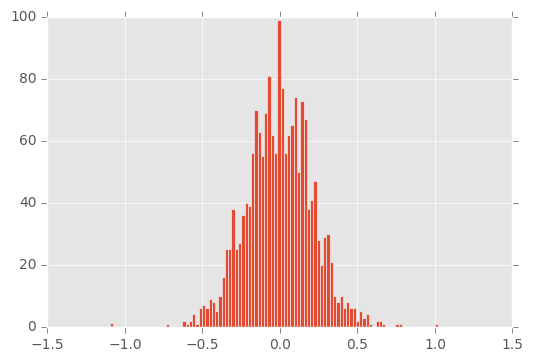

In [7]:
#check train_generator
steering_list = np.empty((0))
for i in range(1, 10):
    steering_list = np.append(steering_list, next(train_generator)[1])

plt.hist(steering_list.astype('float'), bins=100)

In [9]:
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Convolution2D,MaxPooling2D,Flatten,Lambda
from keras.optimizers import Adam
from keras.models import model_from_json

model = Sequential()
model.add(Lambda(lambda x: x/127.5 - 1.0,input_shape=(64,64,3)))
model.add(Convolution2D(32, 3,3 ,border_mode='same', subsample=(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
model.add(Convolution2D(64, 3,3 ,border_mode='same',subsample=(2,2)))
model.add(Activation('relu',name='relu2'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(128, 3,3,border_mode='same',subsample=(1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Dense(1))
model.summary()

model.compile(optimizer='adam', loss='mse')

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 64, 64, 3)     0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 32, 32, 32)    896         lambda_2[0][0]                   
____________________________________________________________________________________________________
activation_3 (Activation)        (None, 32, 32, 32)    0           convolution2d_4[0][0]            
____________________________________________________________________________________________________
maxpooling2d_3 (MaxPooling2D)    (None, 31, 31, 32)    0           activation_3[0][0]               
___________________________________________________________________________________________

In [10]:
nb_epoch=1
history = model.fit_generator(train_generator,
                    samples_per_epoch=40000, nb_epoch=nb_epoch,
                    verbose=1)

Epoch 1/1
40000/40000 [==============================] - 336s - loss: 0.0253     

In [11]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")
print("Model saved.")

Model saved.
